<a href="https://colab.research.google.com/github/ahmedebeed555/Kmeans/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering: A Complete Guide
This notebook demonstrates K-Means clustering, including data cleaning, visualization, model training, and evaluation.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Load and Explore the Dataset
We will use the Iris dataset from scikit-learn, which is often used for clustering demonstrations.

In [2]:
# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Cleaning
We will check for missing values, duplicates, and ensure the data is ready for clustering.

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print('Duplicates:', df.duplicated().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Duplicates: 1


## Data Visualization
Let's visualize the distribution of some features and the relationships in the data.

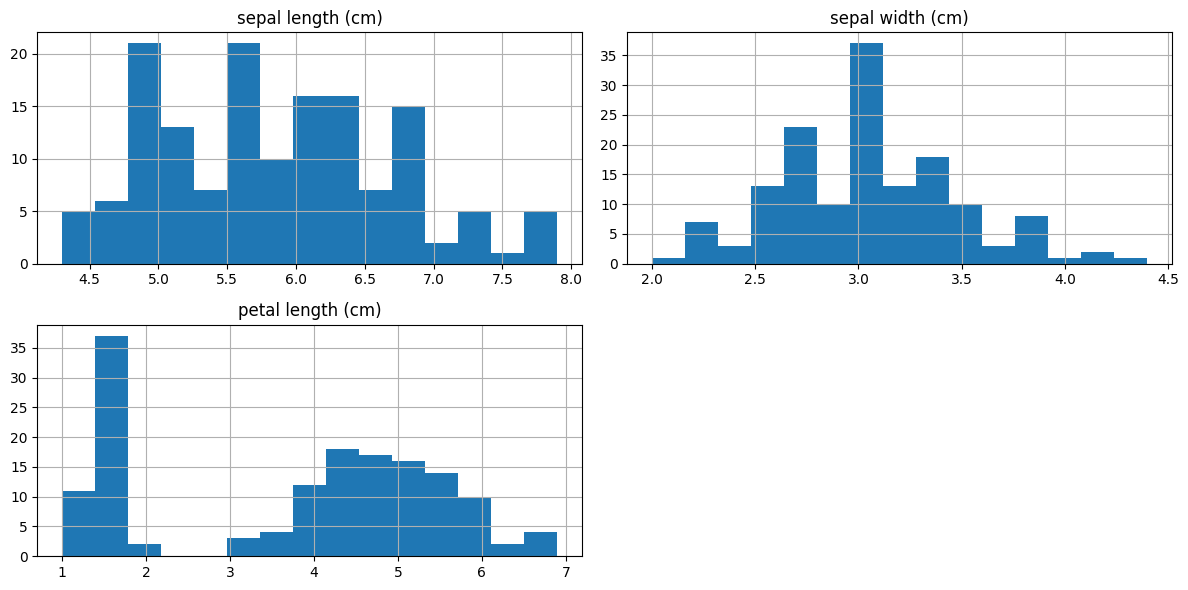

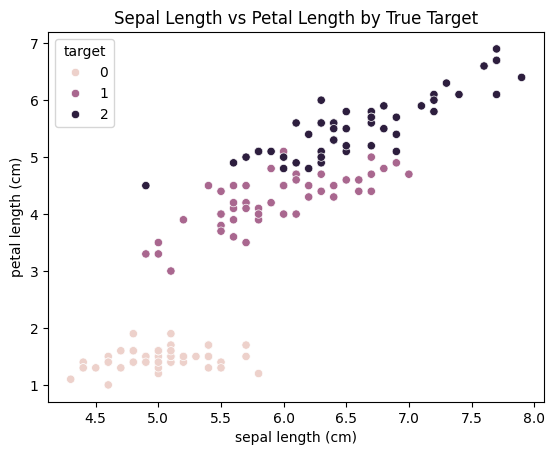

In [4]:
# Visualize the distribution of a few features
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
df[features].hist(bins=15, figsize=(12, 6))
plt.tight_layout()
plt.show()

# Visualize the relationship between two features colored by target
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target', data=df)
plt.title('Sepal Length vs Petal Length by True Target')
plt.show()

## Prepare Data for Clustering
We will scale the features for better clustering performance.

In [5]:
# Scale the features (excluding the target)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

## Train K-Means Clustering Model
We will instantiate and fit a K-Means clustering model.

In [6]:
# Instantiate and fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataframe
df['cluster'] = kmeans.labels_

## Evaluate Clustering Performance
We will evaluate the clustering results by comparing cluster labels to the true species and visualizing the clusters.

Adjusted Rand Index: 0.432804702527474


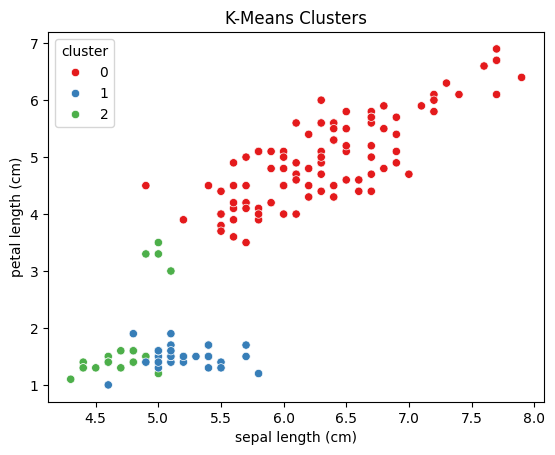

In [7]:
# Compare clusters to true labels
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(df['target'], df['cluster'])
print('Adjusted Rand Index:', ari)

# Visualize clusters
sns.scatterplot(x=df['sepal length (cm)'], y=df['petal length (cm)'], hue=df['cluster'], palette='Set1')
plt.title('K-Means Clusters')
plt.show()